In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import helper as hlp
import gen_data

In [2]:
#load_path = 'C:/Users/Shira/Documents/PhD/deepLearning/sim/sss/res/' # laptop
load_path = 'C:/Users/shirak/Documents/PhD/deepLearning/sim/sss/res/' # PC
#pars = [1, 2, 10, 20, 50, 100]
#par = 'True'
config = 'test_overfitting'
fontsize = 15
matplotlib.rcParams.update({'font.size': fontsize})

['avg_costs', 'train_acc_list', 'issep_sbs', 'nzs_per_epoch', 'config', 'x_train', 'y_train', 'w_learned_list', 'test_acc_list', 'iszero_sbs', 'train_acc_sep_list', 'train_acc_nonsep_list']
Dataset Parameters:
     p = 10 (input dimension)
     n = 1000 (number of training examples)
     gamma = 0.1 (1 / |w*|
     pi_nonsep = 0.1 (fraction of non-separable examples)
Network Parameters:
     k = 200  (hidden layer width is 2k)
     alpha = 0.3 (leaky relu parameter)
Optimization Parameters:
     eta = 0.1 (learning rate)

Components of bound for the number of non-zero steps M:
     |w*|^2 / alpha^2 = 1111.111
     |w*|^2 / min(eta, sqrt(eta)) = 1000.000
Value for R, bound on initial weights norm:
     1/sqrt(2k) = 0.050
To guarantee expressiveness, k should be at least:
     2*(n/(2d-2)) = 112
     k =  200
{'n_test': 1000, 'make_switch': True, 'alpha': 0.3, 'beta': 0, 'res_path': 'C:/Users/shirak/Documents/PhD/deepLearning/sim/sss/res/', 'gamma': 0.1, 'batch_size': 1, 'pi_nonsep': 0.1,

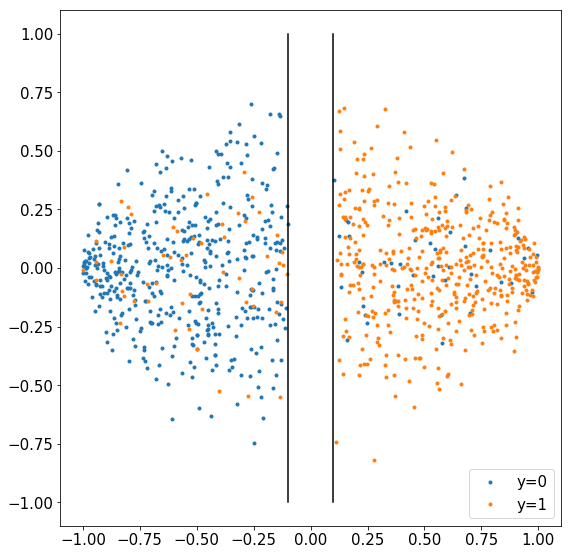

In [3]:
data = np.load(load_path + config + '_data' + '.npy').reshape(1)[0]

all = np.load(load_path + config + '_res' + '.npz')
print(all.files)

cfg = all['config'].reshape(-1)[0]
hlp.print_params(cfg)
k = cfg['k']
eta = cfg['learning_rate']
alpha = cfg['alpha']
gamma = cfg['gamma']
pi = cfg['pi_nonsep']

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
w_star_hat = data['w_star_hat']
n_train = x_train.shape[0]
dim = x_train.shape[1]
w_star_norm = 1 / gamma

train = all['train_acc_list']
train_sep = all['train_acc_sep_list']
train_nonsep = all['train_acc_nonsep_list']
test = all['test_acc_list']
nzs_per_epoch = all['nzs_per_epoch']
iszero_sbs = all['iszero_sbs']
issep_sbs = all['issep_sbs']
#delta_sbs = all['delta_sbs']
w_learned = all['w_learned_list']

w_star = w_star_norm * w_star_hat
vi = 1 / np.sqrt(2*k)
w_max = 1 / np.sqrt(2*k)

print(cfg)
hlp.plot_data(x_train, y_train, w_star_hat, gamma)


In [4]:
# n_test_plus = 10000
# x_test_plus, y_test_plus = gen_data.gen_xy(n_test_plus, dim, 0, data['U'], False)

In [5]:
# all = np.load(load_path + config + '_res' + '.npz')
# w_learned_sbs = all['w_learned_sbs']

# t = len(w_learned_sbs) - 1
# print('total number of steps is: ', t)
# #t = n_train - 1
# t = 0
# wrand = rn.normal(0, 1, [1000, dim])
# #y_hat_train = compute_f(w_learned_sbs[t], x_train, alpha, vi)
# #hlp.plot_data(x_train, y_hat_train, w_star_hat, gamma)
# y_hat_test_plus = compute_f(wrand, x_test_plus, alpha, vi)
# hlp.plot_data(x_test_plus, y_hat_test_plus, w_star_hat, gamma)

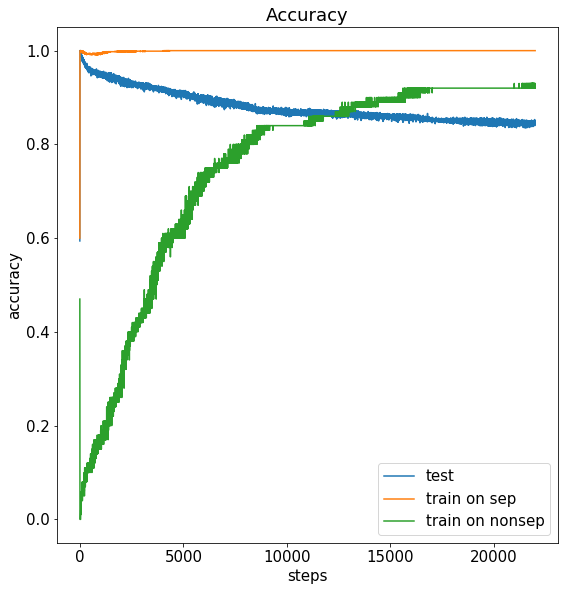

In [6]:
all = np.load(load_path + config + '_res' + '.npz')
train_sep = all['train_acc_sep_list']
train_nonsep = all['train_acc_nonsep_list']
test = all['test_acc_list']
min_ind = 0
max_ind = len(train_sep)

plot_x, plot_y = 8, 8
n0, n1 = 1, 1

fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
    
ax = axes
ax.set_title('Accuracy')
ax.set_xlabel('steps')
ax.set_ylabel('accuracy')
ax.plot(test[min_ind:max_ind], '-', label = 'test')
ax.plot(train_sep[min_ind:max_ind], '-', label = 'train on sep')
ax.plot(train_nonsep[min_ind:max_ind], '-', label = 'train on nonsep')
ax.legend()

9951


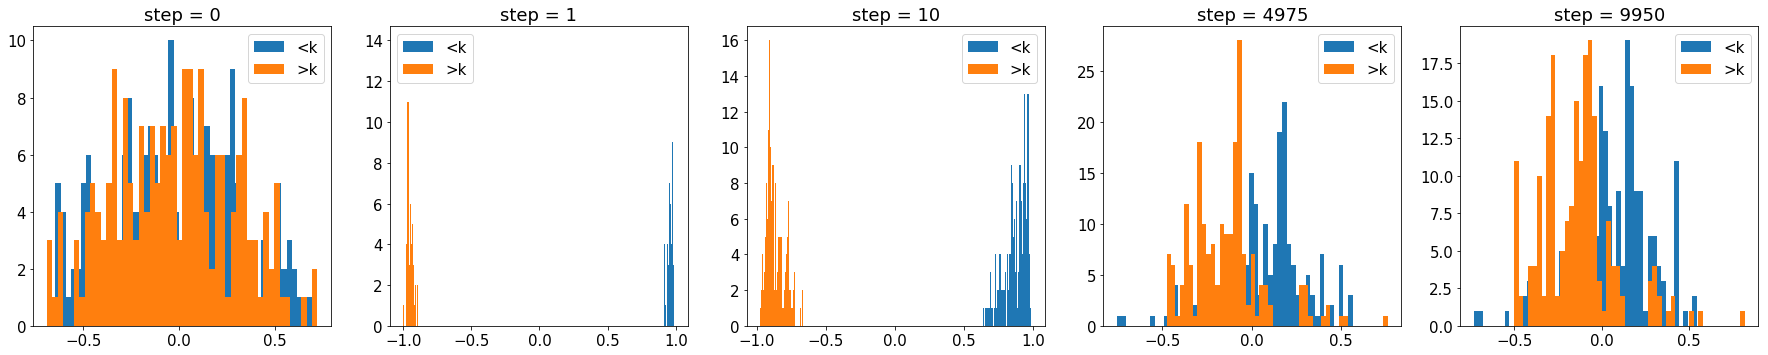

In [55]:
all = np.load(load_path + config + '_res' + '.npz')
w_learned = all['w_learned_list']

print(len(w_learned))
max_step = len(w_learned) - 1
steps = [0, 1, 10, int(max_step/2), max_step]

vec = w_star_hat

plot_x, plot_y = 5, 5
n0, n1 = 1, len(steps)
fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)

for i_step in range(len(steps)):
    step = steps[i_step]    
    w = w_learned[step]
    norms = np.sqrt(np.sum(w**2, axis=1))
    angle = np.dot(w, vec) / norms
                
    ax = axes[i_step]
    ax.set_title('step = {}'.format(step))
    ax.hist(angle[:k], 50, label = '<k')
    ax.hist(angle[k:], 50, label = '>k')
    ax.legend()


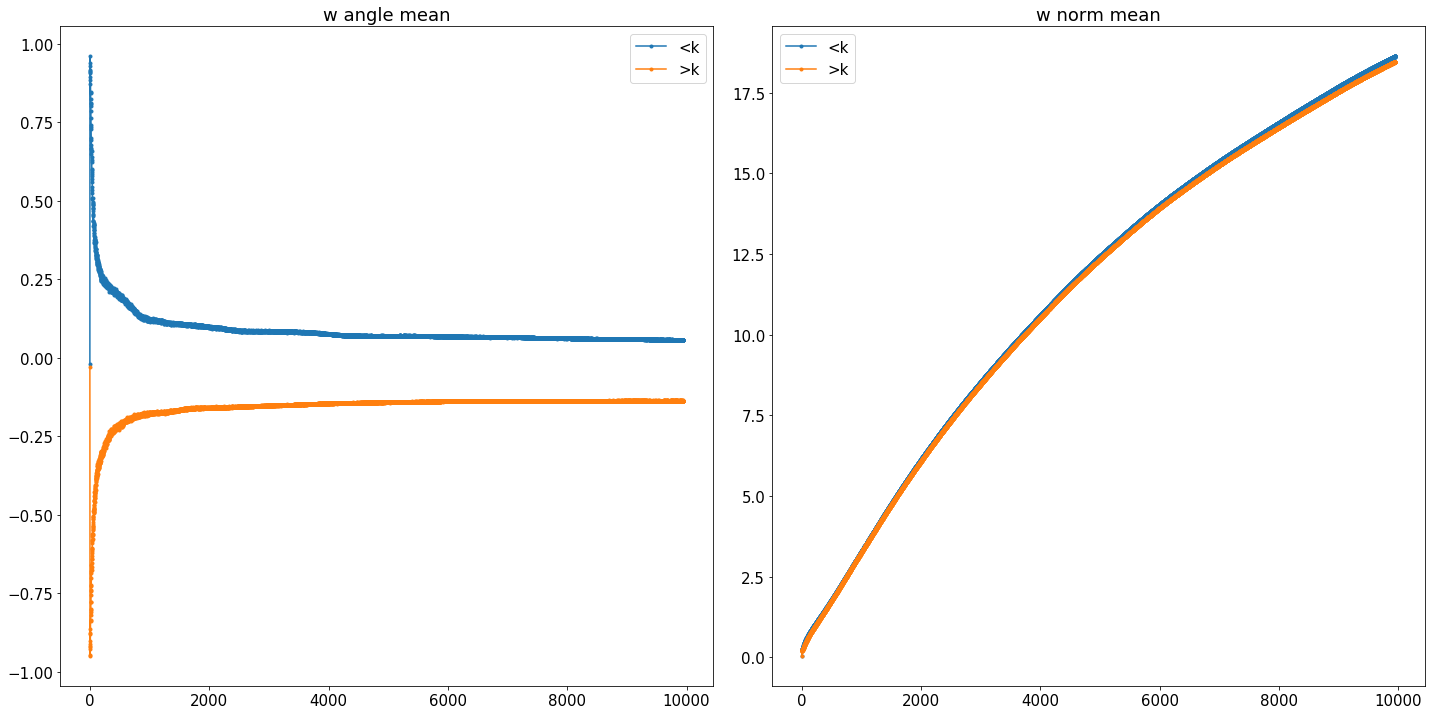

In [57]:
all = np.load(load_path + config + '_res' + '.npz')
w_learned = all['w_learned_list']
min_ind = 0
max_ind = len(w_learned) - 1

plot_x, plot_y = 10, 10
n0, n1 = 1 , 2
fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
vec = w_star_hat

norms = np.sqrt(np.sum(w_learned**2, axis=2))
angle = np.dot(w_learned, vec) / norms

angle_mean_0 = np.mean((angle[:,:k]), axis=1)
angle_mean_1 = np.mean((angle[:,k:]), axis=1)

ax = axes[0]
ax.plot(angle_mean_0[min_ind:max_ind], '.-', label = '<k')
ax.plot(angle_mean_1[min_ind:max_ind], '.-', label = '>k')
ax.set_title('w angle mean')
ax.legend()

ax = axes[1]
ax.plot(np.mean(norms[:,:k][min_ind:max_ind], axis=1), '.-', label = '<k')
ax.plot(np.mean(norms[:,k:][min_ind:max_ind], axis=1), '.-', label = '>k')
ax.set_title('w norm mean')
ax.legend()

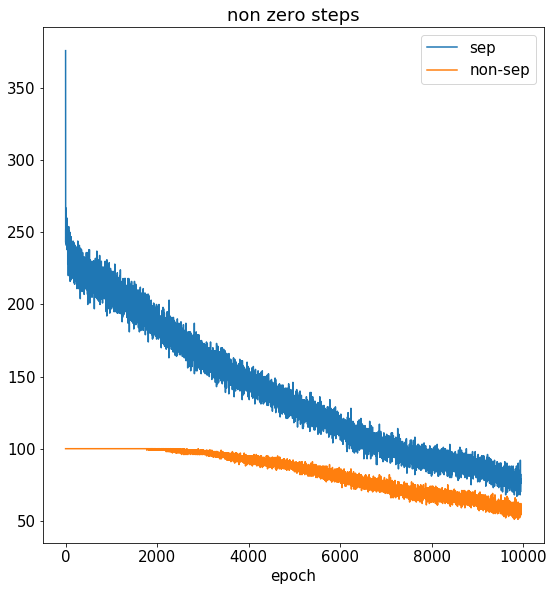

In [58]:
all = np.load(load_path + config + '_res' + '.npz')
nzs_per_epoch = all['nzs_per_epoch']
min_ind = 0
max_ind = len(nzs_per_epoch[0]) - 1

plot_x, plot_y = 8, 8
n0, n1 = 1, 1
fig, ax = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
#max_ind = len(G_w)

ax.set_title('non zero steps')
ax.set_xlabel('epoch')
ax.plot(nzs_per_epoch[1][min_ind:max_ind], '-', label='sep')
ax.plot(nzs_per_epoch[2][min_ind:max_ind], '-', label='non-sep')
ax.legend()

In [32]:
# plot_x, plot_y = 8, 8
# n0, n1 = 1, 1
# fig, ax = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
# fig.tight_layout(h_pad = 5)

# w_learned_nzs = w_learned_sbs[np.argwhere(iszero_sbs==0)][:,0,:,:]
# print(w_learned_nzs.shape)
# print(w_learned_sbs.shape)
# min_ind = 0
# max_ind = 200#len(w_learned_nzs)

# G_w = np.asarray([np.sqrt(np.sum(w**2)) for w in w_learned_nzs])
# F_w = np.asarray([(np.sum(w[:k,:]*w_star_hat-w[k:,:]*w_star_hat)) * w_star_norm for w in w_learned_nzs])
# T = np.arange(max_ind)
# W_star_norm = w_star_norm * np.sqrt(2*k) 
# delta_nzs = delta_sbs[np.argwhere(iszero_sbs==0)][:,0]
# issep_nzs = issep_sbs[np.argwhere(iszero_sbs==0)][:,0]
# delta_bar_sep = np.cumsum(delta_nzs * issep_nzs)
# delta_bar_nonsep = np.cumsum(delta_nzs * (1 - issep_nzs))

# upper_bound = np.sqrt(G_w[0]**2 + T*(2*k*eta**2*vi**2+2*eta))*W_star_norm
# sep_lower_bound = F_w[0] + 2*k*eta*vi*alpha*T
# F_lower_bound = F_w[0] + 2*k*eta*vi* (alpha * delta_bar_sep - delta_bar_nonsep)
# F_upper_bound = F_w[0] + 2*k*eta*vi* (delta_bar_sep - alpha * delta_bar_nonsep)

# ax.set_xlabel('t - non-zero steps')
# ax.plot(upper_bound[min_ind:max_ind], label='upper bound')
# ax.plot((G_w*W_star_norm)[min_ind:max_ind], '.-', label='G(W_t)*|W_star|=|W_t|*|W_star|')
# ax.plot(F_w[min_ind:max_ind], '.-', label='F(W_t)=<W_t,W_star>')
# ax.plot(sep_lower_bound[min_ind:max_ind], label='separable case lower bound')
# ax.plot(F_lower_bound[min_ind:max_ind], label='F lower bound')
# ax.plot(F_upper_bound[min_ind:max_ind], label='F upper bound')
# ax.legend()

In [33]:
# plot_x, plot_y = 8, 8
# n0, n1 = 1, 1
# fig, ax = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
# fig.tight_layout(h_pad = 5)
# #max_ind = len(G_w)

# ax.plot(delta_bar_sep, '.-', label = 'sep')
# ax.plot(delta_bar_nonsep, '.-', label = 'nonsep')
# ax.legend()